<a href="https://colab.research.google.com/github/platers/meta-transfer-learning/blob/master/reward_generalize_tester.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import gym
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

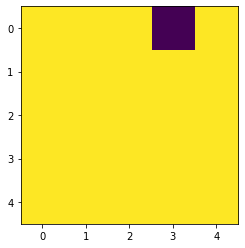

In [7]:
class TransferTestEnv(gym.Env):
  def __init__(self, bg_color, agent_color):
    self.bg_color = bg_color
    self.agent_color = agent_color
    self.color_num = 1
    self.env_size = 5
    pass

  def reset(self):
    self.location = np.random.randint(0, self.env_size, [2])
    color_extra_dim = np.reshape(self.bg_color, [1,1,self.color_num])
    state = np.tile(color_extra_dim, [self.env_size, self.env_size, self.color_num])

    state[self.location[0], self.location[1]] = self.agent_color

    reward = self.location[0] + self.location[1]

    return state, reward

state, reward = TransferTestEnv(5, 1).reset()
plt.imshow(np.squeeze(state))


In [0]:
def generate_data(dataset_size, env_params):
  xs = []
  ys = []
  for _ in range(dataset_size):
    state, reward = TransferTestEnv(*env_params).reset()
    xs.append(state)
    ys.append(reward)

  xs = np.array(xs)
  ys = np.array(ys)

  return xs, ys

In [0]:
xs, ys = generate_data(1000, (5,1))

In [0]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=xs.shape[1:]),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64),
])
model.compile(optimizer='adam',
              loss='mse',
              )

In [43]:
model.fit(xs, ys, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 0.1048
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 0.0986
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.0941
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.0813
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.0789
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.0695
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.0629
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 0.0568
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 0.0546
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 0.0482
Epoch 11/100
32/32 [==============================] - 0s 1ms/step - loss: 0.0465
Epoch 12/100
32/32 [==============================] - 0s 1ms/step - loss: 0.0428
Epoch 13/100
32/32 [=================

In [0]:
xs_val, ys_val = generate_data(1000, (5,1))
xs_val_differnt, ys_val_different = generate_data(1000, (4,2))

In [49]:
model.evaluate(xs, ys)
model.evaluate(xs_val, ys_val)
model.evaluate(xs_val_differnt, ys_val_different)

32/32 [==============================] - 0s 1ms/step - loss: 1.3584


1.3583735227584839